# 1. Exploratory Data Analysis 

This notebook looks into exploring the Titanic data, we will be looking into descriptive statistics, measures or spread for the different features in the model - along with doing some intermediary feature engineering to see if we can spot any interesting trends within the data. 

We will be using several packages for our analysis including: 
1. pandas 
2. numpy 
3. matplotlib 
4. seaborn 

All plots will be saved to the `/outputs/Explorartory_Data_Analysis` folder in the project structure.



In [28]:
# setting up the packages and modules that are needed for analysis
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

In [29]:
# read the data in to the notebook - we will have a look at the training set first 
training_df = pd.read_csv('../Data/train.csv')

In [30]:
# observe the first 5 rows
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# observe the last 5 rows 
training_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [32]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data types seem to be appropriate for the features we have available, except we should be careful of **Pclass** as it is really a categorical variable - we might need to encode it later if we make some plots

we'll have a look at the descriptive statistics:

In [33]:
training_df_describe = training_df.describe()
training_df_describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The Age feature seems to have some missing values within the counts

In [34]:
# Age seems to have some missing counts - let's visualize this more using matplotlib 
training_avg_values = training_df_describe.loc['count'].to_frame()
training_avg_values.index.set_names(['Features'], inplace = True)
training_avg_values.reset_index(level = 0, inplace=True)
training_avg_values

,Features,count
0,PassengerId,891.0
1,Survived,891.0
2,Pclass,891.0
3,Age,714.0
4,SibSp,891.0
5,Parch,891.0
6,Fare,891.0


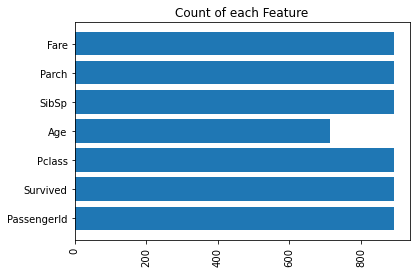

In [35]:
# plotting with matplotlib     
fig, ax = plt.subplots()
ax.barh(y = training_avg_values['Features'],width = training_avg_values['count'])
plt.title('Count of each Feature')
plt.xticks(rotation = 90)
plt.show()

let's investigate this further within the data - maybe there are some missing values?

In [36]:
training_df['Age'].head(10), training_df['Age'].tail(10)

(0    22.0
 1    38.0
 2    26.0
 3    35.0
 4    35.0
 5     NaN
 6    54.0
 7     2.0
 8    27.0
 9    14.0
 Name: Age, dtype: float64,
 881    33.0
 882    22.0
 883    28.0
 884    25.0
 885    39.0
 886    27.0
 887    19.0
 888     NaN
 889    26.0
 890    32.0
 Name: Age, dtype: float64)

It appears there are some NaN values within the Feature for Age - we should check what these mean across the data - from the data dictionary we are told that fractional ages are given: 

*age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5*

Let's filter down ages less than 1 to see if they appear in this format, they may be contributing to the **NaN** values we see

In [37]:
training_df.loc[training_df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [38]:
# The total count of those aged less than 1 is 7
training_df.loc[training_df['Age'] < 1]['Age'].count()

7

So it appears that the NaN values are not those aged less than 1, let's observe who they belong to! 

In [39]:
training_df[training_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


It appears that 177 rows are missing the Age feature - this is around ~20% of all rows within the training dataset - we may need to impute these values so that we can build a model. 

We can either use the mean of the **Age** feature - although this would yield a value of 30 for all of those missing values, this may not be as accurate excluding the other features to derive what the values to be imputed could be. 

Instead we should opt for an approach of using **Sex, Age and Pclass** - since a single persons gender, age and the passenger class they have as attributes can be better suited for imputing the missing Age values.

In [40]:
print(training_df.groupby(['Sex', 'Pclass'])['Age'].agg('mean').round(1))

Sex     Pclass
female  1         34.6
        2         28.7
        3         21.8
male    1         41.3
        2         30.7
        3         26.5
Name: Age, dtype: float64


From the above we can see a better distribution across the different genders, passenger classes and age, we'll use these values to impute the missing NaN values.

In [41]:
training_df.groupby(['Sex', 'Pclass'])['Age'].agg('mean').round(1)

Sex     Pclass
female  1         34.6
        2         28.7
        3         21.8
male    1         41.3
        2         30.7
        3         26.5
Name: Age, dtype: float64

In [42]:
training_df['Age'] = training_df['Age'].fillna(training_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean').round(1))

In [43]:
# observe those values with missing values again:
# using the above table we can see along with extracting out these rows with loc
training_df.loc[[5,17, 19,26,28]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,26.5,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.7,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.8,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,26.5,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.8,0,0,330959,7.8792,NaN,Q


The imputed above values have transferred correctly - we can start to explore the data further. 

Let's look into the **Fare** feature the only financial based variable within the dataset

In [44]:
titanic_fare_prices = training_df['Fare']
titanic_fare_prices.head(5)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

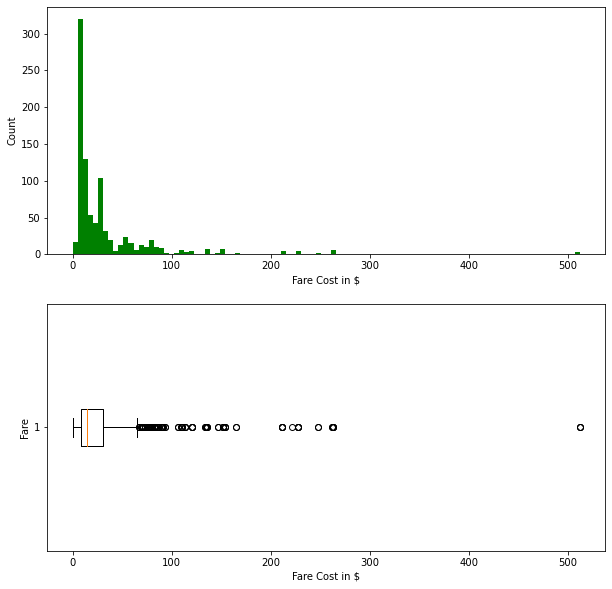

In [45]:
# we can create a plot of the distribution of Fare prices over the entire data. 
fig, (ax1, ax2) = plt.subplots(figsize=(10, 10), nrows = 2, ncols = 1)
ax1.hist(titanic_fare_prices, bins=100,color='g')
ax1.set_xlabel('Fare Cost in $')
ax1.set_ylabel('Count')
ax2.boxplot(titanic_fare_prices,vert=False)
ax2.set_xlabel('Fare Cost in $')
ax2.set_ylabel('Fare')
plt.show();

There is a definite outlier within the data, the median value is around less than 100 and an outlier exists around $500 - definitely something askew here within the data, as that's too expensive for a ticket in 1900's!

In [46]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# let's look into split of the different male and female occurences in the dataset

In [48]:

sex_survived = training_df[['Sex', 'Survived']].value_counts()

In [49]:
sex_survived

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

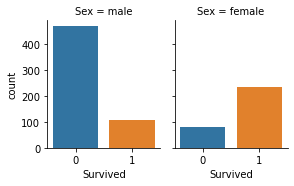

In [50]:
sns.catplot(x="Survived", col="Sex", col_wrap=2,
                data=training_df[training_df.Sex.notnull()],
                kind="count", height=2.5, aspect=.8);

As we can see from the above, there are two things that point out to us:
* More Females survived than Men - Almost double
* More Males died than Female - Almost Four Times as much!

Potentially we could be looking at an imbalance of data for predicting our outcome, 

Let's observe some of the remaining features that we have available:

In [51]:
training_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We'll have a look at the Passenger Class feature along with the Survival rate - maybe there is some information here of interest and by gender! 

Let's plot the entire numerical features univariately against themselves with histograms.

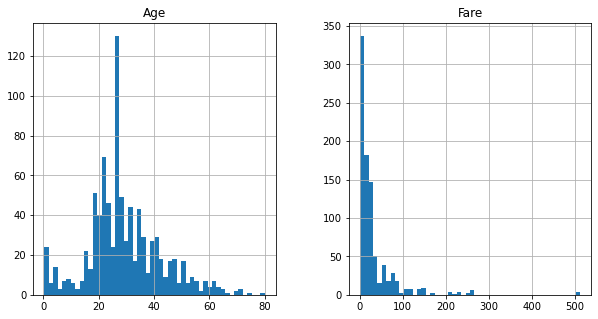

In [52]:
numerical_features = ['Age', 'Fare']
training_df[numerical_features].hist(bins=50, figsize=(10,5))
plt.show();

From the above it makes it clear that we may need to normalize the Fare feauture since there is a skewness to the data and we should really be looking at a normal distribution. 

Age on the other hand is more normally distributed than the Fare Price. 

Let's check what a count plot of each Feature looks like:

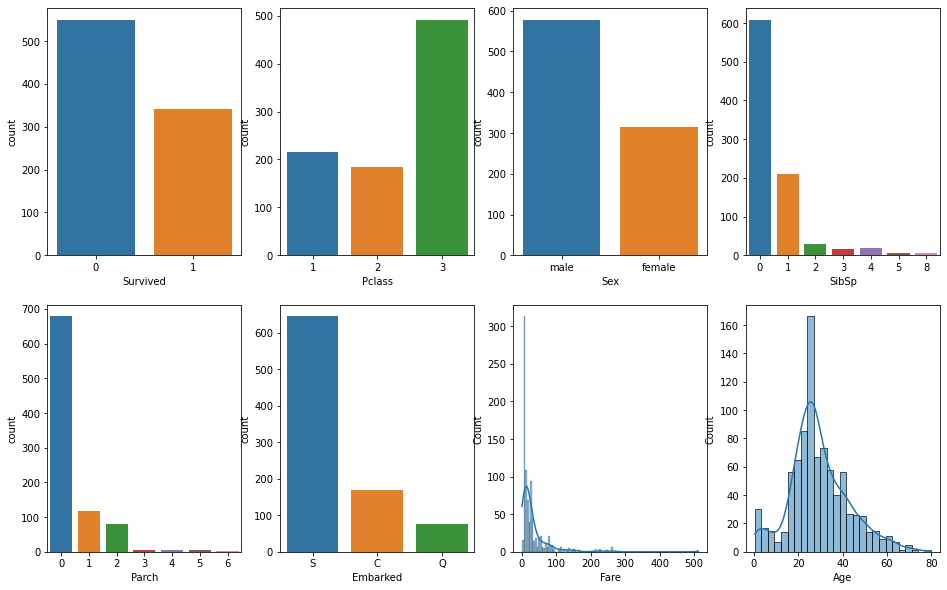

In [53]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x ='Survived',data=training_df,ax=axes[0,0])
sns.countplot(x= 'Pclass',data=training_df,ax=axes[0,1])
sns.countplot(x ='Sex',data=training_df,ax=axes[0,2])
sns.countplot(x= 'SibSp',data=training_df,ax=axes[0,3])
sns.countplot(x='Parch',data=training_df,ax=axes[1,0])
sns.countplot(x='Embarked',data=training_df,ax=axes[1,1])
sns.histplot(x=training_df['Fare'], kde=True,ax=axes[1,2])
sns.histplot(x=training_df['Age'].dropna(),kde=True,ax=axes[1,3])
plt.show();

Of the above features by count plot by those who have survived. We can see a few different things here: 
1. Passenger 3 had the most passengers not surviving. 
2. More Males did not survive - So gender plays a big role in survival rates. 
3. Those who survived and did not had the least amount of siblings or spouses. This the same for those who had a parent or child aboard the Titanic.
4. Most of those who did not survived departed from Southampton (S)

At this point it would be useful to see a correlation plot for all the numerical features and see if we can identify any positive or negative correlations to the target variable.

We have to identify that there are some categorical features within the data that are not to be plotted in this way, by looking at the data dictionary we can see that: 

In [57]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We'll only be using the numerical columns: 
- Survived (target class) 
- Age
- SibSp 
- Parch 
- Fare

In [59]:
numerical_cols = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']

In [61]:
corr = training_df[numerical_cols].corr()
corr

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.067392,-0.035322,0.081629,0.257307
Age,-0.067392,1.000000,-0.251241,-0.180684,0.118301
SibSp,-0.035322,-0.251241,1.000000,0.414838,0.159651
Parch,0.081629,-0.180684,0.414838,1.000000,0.216225
Fare,0.257307,0.118301,0.159651,0.216225,1.000000


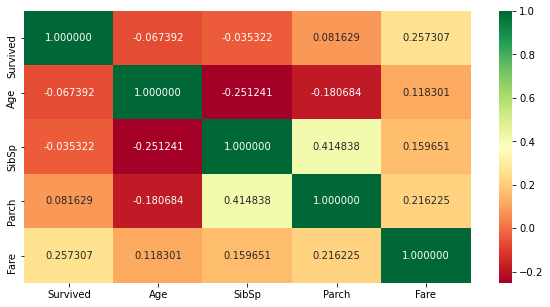

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
corr_plot = sns.heatmap(corr, annot=True, fmt="f", cbar=True, cmap="RdYlGn") 
corr_plot.get_figure().savefig("../Outputs/correlation_plot.png")
plt.show();

From the above correlation plot - we can see that there is a positive correlation between: 
- Fare and Survival Rate +ve
- Parch and Survival Rate +ve 

So as the Fare increase they are more correlated with surviving. 

On the other hand we can see that: 
- As the Age decreases so does the survival rate 
- As the Number of Siblings Decreases so does the survival rate 



In [67]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.026047,22.117887,0.329690,0.553734
1,28.186754,48.395408,0.464912,0.473684


So from the above table we can see what the average values are across those different variables: 
- Average age is roughly the same for both groups 
- Higher Fare price - more chance of survival 
- Parents and Children travelling together doesn't show too much of a difference

In [68]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Seems that more people survived in the following cases: 
1. In Passenger Class 1 
2. Females 
3. Those embarking from Southampton

In [70]:
training_df.Cabin.head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [71]:
# It seems that Cabins have multiple values and we should be looking at what these values are:
training_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [72]:
training_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
C82            1
E50            1
D30            1
C101           1
A10            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
# it appears that there is a letter followed by a number for each of the cabin numbers
# we can probably 